# Getting Started with HousePrice - Kaggle
### [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)
Predict sales prices and practice feature engineering, RFs, and gradient boosting.



In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Part 1 Data Analyses

## 1 Load Data

In [2]:
# Load data
train_data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

display(train_data)
display(test_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


That is to say, there are:
- 1460 samples
- 81 features

First, take a sip at what the features are.

Also, generate a list form as an input for excel.(commented out.)

In [3]:
all_features = set(train_data.columns)
numeric_features = set(train_data.describe().columns)
categoric_features = all_features-numeric_features

## 2 Data Pre-Analyses

Manually analysed with Excel, I firstly note these features as main targets:

**Numeric:**
1. GrLivArea
2. TotalBsmtSF
---
**Categorical:**
3. OverallCond
4. YearBuilt
5. Utilities
6. Neighborhood
7. OverallQual

Use seaborn to plot and check.

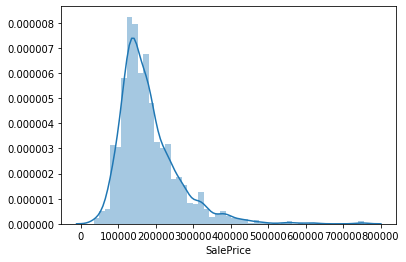

In [4]:
sns.distplot(train_data['SalePrice']);

Apparently, It's a Positive(Left) Skewed Distribution;

Do a box-cox(lambda = 0) transformation on train_data.

$ Y = log(X+1) $

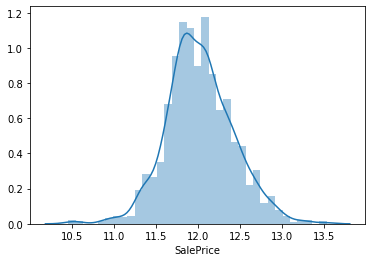

In [9]:
sns.distplot(np.log1p(train_data['SalePrice']));

### Numeric Features
#### GrLivArea & TotalBsmtSF

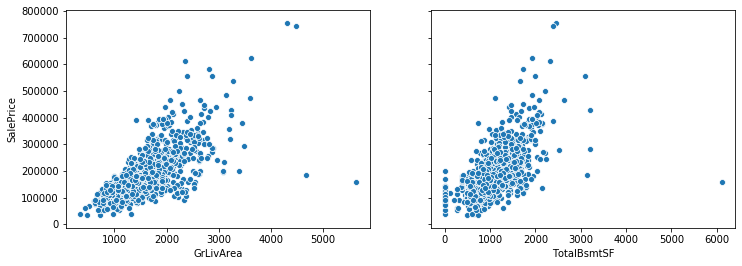

In [6]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(12,4))

# GrLivArea
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data, ax=axes[0])
# TotalBsmtSF
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_data, ax=axes[1])
plt.show()

Easy to see, SalePrice appears to be likely **propotional** to these two features.

Some abnoramal points on the graph can be ignored since they are too uncommon.

### Categorical Features

#### OverallCond & OverallQual

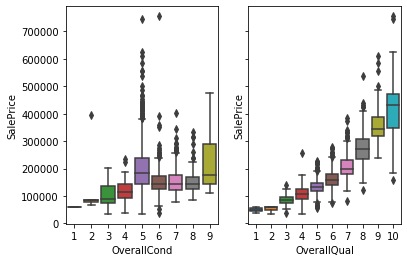

In [7]:
f, axes = plt.subplots(1, 2, sharey=True)

# OverallCond
sns.boxplot(x='OverallCond', y='SalePrice', data=train_data, ax=axes[0])

# OverallQual
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, ax=axes[1]);

OverallCond is **NOT** of a linear relation with SalePrice;

However, OverallQual is.

Check the relationship between OverallCond and OverallQual.

In [8]:
print(train_data.corr()['OverallQual']['OverallCond'])

-0.09193234263907184


Almost no correlation.

#### YearBuilt

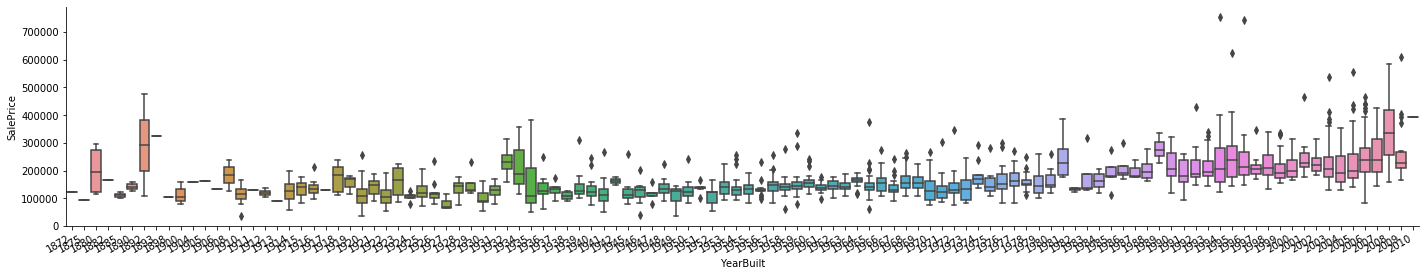

In [9]:
# YearBuilt
g =sns.catplot(x='YearBuilt', y='SalePrice', kind='box', height=4, aspect=5, data=train_data)
g.fig.autofmt_xdate()

It doesn't appear to be a high trendency, however, **the newer the house was built, the SalePrice goes higher**.

#### Utilities

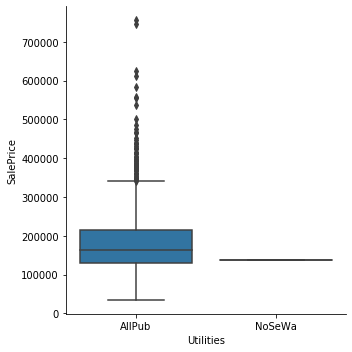

In [10]:
sns.catplot(x='Utilities', y='SalePrice', kind='box', data=train_data);

In [11]:
print('House not \'AllPub\': ', len(train_data.loc[train_data['Utilities']!='AllPub']))

House not 'AllPub':  1


The Result surprised me that, only one included house is not of 'AllPub' on its Utilities;

Consequently, 'Utilities' should not be taken into account.

#### Neighborhood

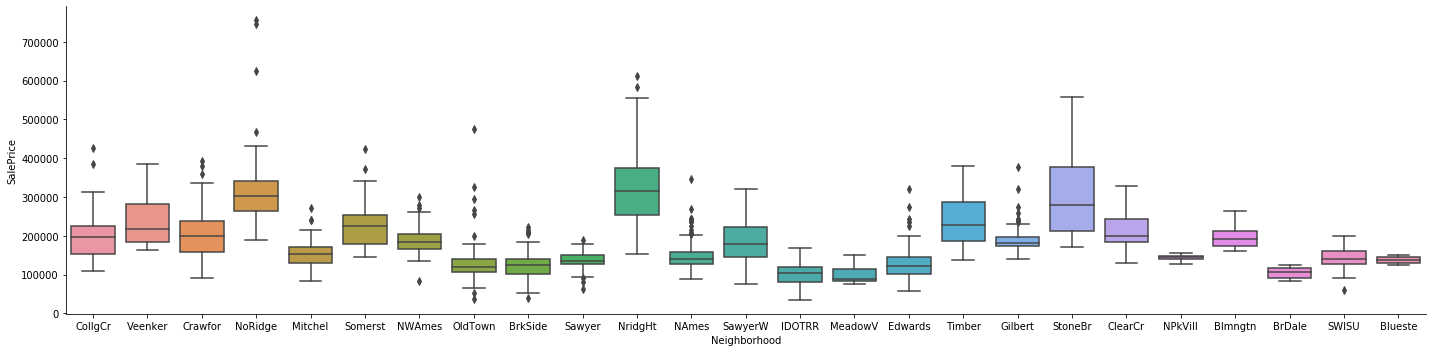

In [12]:
sns.catplot(x='Neighborhood', y='SalePrice', kind='box', aspect=4, data=train_data);

The Neighborhood feature has much effect, Check its corr. with SalePrice.

Since Neighborhood feature is categorical, use get_dummies() to change it into one-hot encode.

### Conclusion on feature pre-analyses

As a result,
1. SalePrice accord with skewed normal distribution, Use box-cow(lambda=0) to transform it into normal distribution.
2. Numeric features GrLivArea & TotalBsmtSF should be taken into acount.
3. Categorical features YearBuilt, Neighborhood, OverallQual should be taken into acount.

## 3 Data Correlation

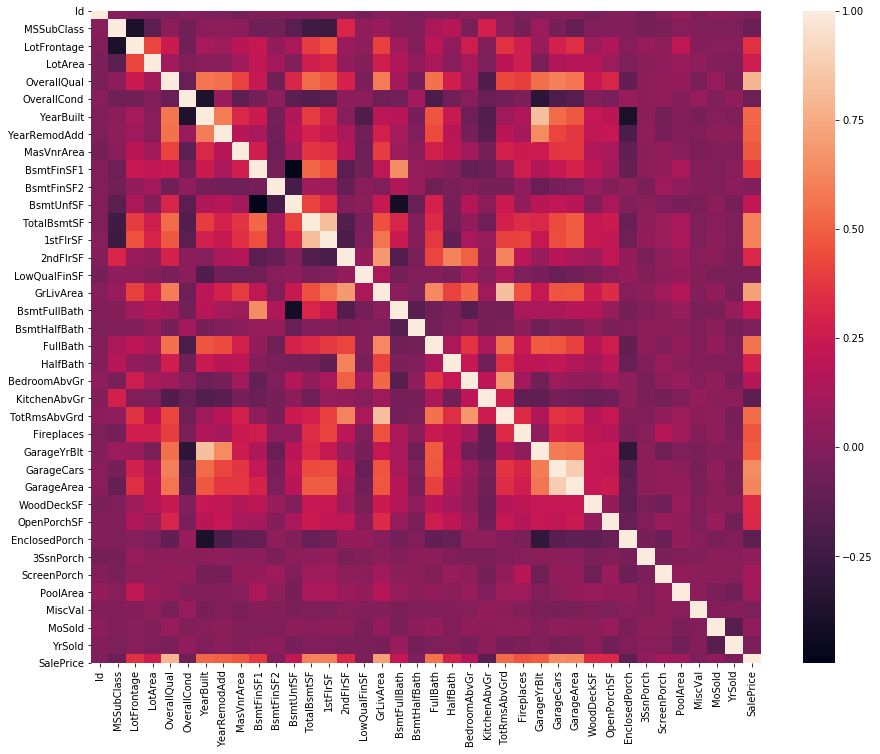

In [13]:
data_corr = train_data.corr()
plt.subplots(figsize=(15,12))
sns.heatmap(data_corr, square=True);

It shows that some features have multicollinearity, which means they contain almost the same message.

Then, focus on correlation between SalePrice and other features.

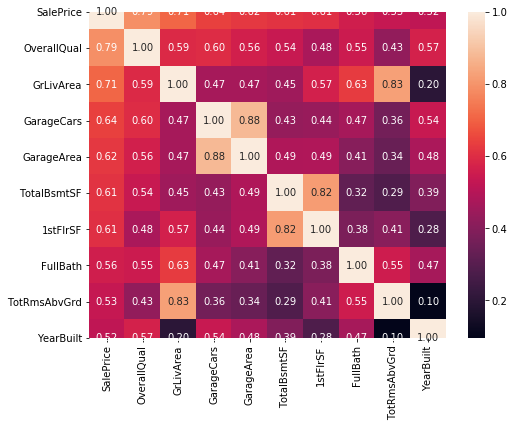

In [14]:
k = 10 # number of features for heatmap
features = data_corr.nlargest(k, 'SalePrice')['SalePrice'].index
SalePrice_corr = np.corrcoef(train_data[features].values.T)
plt.subplots(figsize=(8,6))
sns.heatmap(SalePrice_corr, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=features.values, xticklabels=features.values);

In previous part, these features are in account:

**Numeric**
1. GrLivArea.
2. TotalBsmtSF

**Categorical**
1. OverallQual
2. YearBuilt
3. Neighborhood
---

*\# corrcoef = correlation coefficient*

According the result, SalePrice also has high corrcoef with GarageCars, GarageArea, 1stFlrSF, TotRmsAbvGrd.

What's interesting is that, GarageCars and GarageArea has a corrcoef of **0.88**, TotRmsAbvGrd and GrLivArea has a corrcoef of **0.83**, 1stFlrSF and TotalBsmtSF has a corrcoef of **0.82**, so we can only consider one of them because of the 'multicollinearity'.

**GarageCars is preferrable for its higher corrcoef.**

So far, these features are in account:

**Numeric**
1. GrLivArea.
2. TotalBsmtSF
3. GarageCars

**Categorical**
1. OverallQual
2. YearBuilt
3. Neighborhood

Use pairplot() to take a sip:

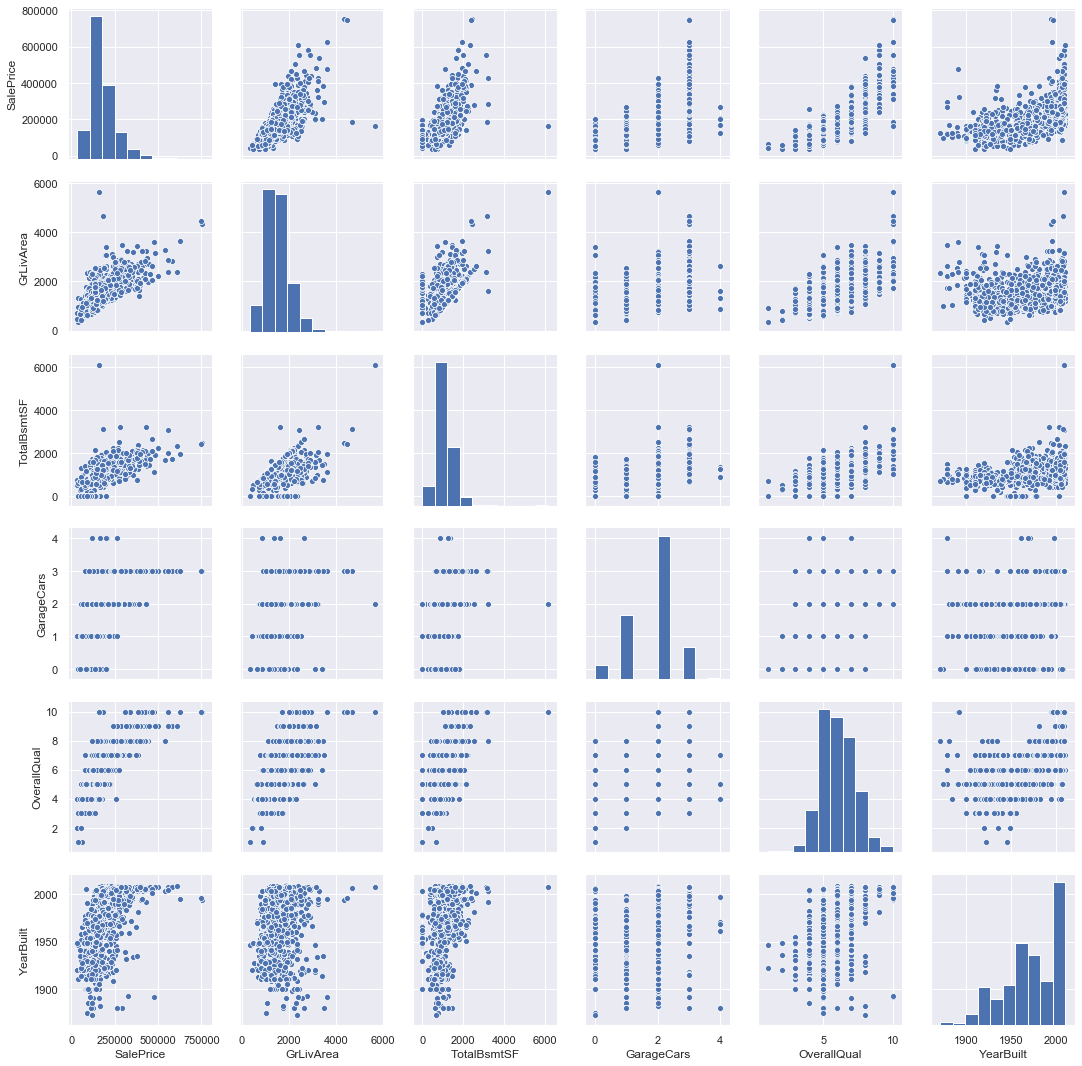

In [15]:
features_in_account = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'OverallQual', 'YearBuilt', 'Neighborhood']

sns.set()
sns.pairplot(train_data[features_in_account], height=2.5);

There're several points to pay attention:
1. SalePrice is mostly linear correlated to those features.
2. Focus on the graph: YearBuilt-SalePrice, there's a sharp increment during the very close years(almost fit exponential increase).

## 4 Data Completion

In terms of those missing data, we should focus:
- The universality of the data.
- A Random data or a Regular data?

First, list all missing data:

In [16]:
missing_sum = train_data.isnull().sum().sort_values(ascending=False)
missing_rate = (missing_sum/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_sum, missing_rate], axis=1, keys=['Total','Missing Rate'], sort=False)
display(missing_data.head(20))

,Total,Missing Rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


That is to say:
- PoolQC, MiscFeature, etc. will not be taken into account.
- Garage data above will be discarded since GarageCars can provide enough info. on garage.
- MasVnrArea and MasVnrType have high corrcoef, so they will be discarded.
- Electrical has only one missing data, it doesn't have a high corrcoef with SalePrice, so I simply ignore the missing one.

Drop and Check if there's still missing data.

In [17]:
train_data = train_data.drop(missing_data[missing_data['Total']>1].index, axis=1)
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index)
train_data.isnull().sum().max()

0

Do the same job on test_data:

In [18]:
test_data = test_data.drop(missing_data[missing_data['Total']>1].index, axis=1)

In [19]:
display(train_data)
display(test_data)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


Good Job! No missing value left.

Then, let's find out those abnormal data.

## 5 Abnormal Data Handling

In this part, we should consider in two aspects:
1. Sigle-factor - SalePrice
2. Multi-factors - SalePrice-GrLivArea/TotalBsmtSF

### Sigle Factor
Standardize the data and observe the result, to help build a threshold.

In [20]:
from sklearn.preprocessing import StandardScaler
Scaled_SalePrice = StandardScaler().fit_transform(train_data['SalePrice'][:,np.newaxis])
below_thershold = Scaled_SalePrice[Scaled_SalePrice[:,0].argsort()][:10]
above_thershold = Scaled_SalePrice[Scaled_SalePrice[:,0].argsort()][-10:]

print("Below Thershold:\n", below_thershold)
print("Above Thershold:\n", above_thershold)


Below Thershold:
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
Above Thershold:
 [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Multi Factors

GrLivArea - SalePrice


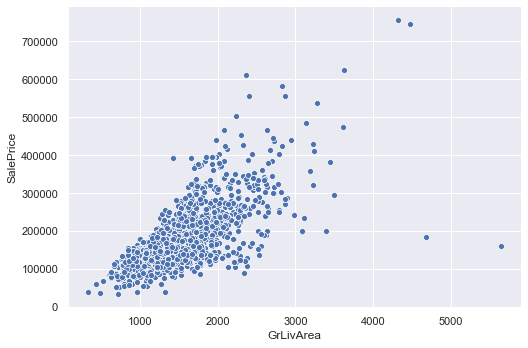

In [21]:
print("GrLivArea - SalePrice")
display(sns.relplot(x='GrLivArea', y='SalePrice', aspect=1.5, data=train_data))

In [22]:
train_data = train_data.drop(train_data.loc[train_data['GrLivArea']>4000].loc[train_data['SalePrice']<200000].index)

GrLivArea - SalePrice - discarded


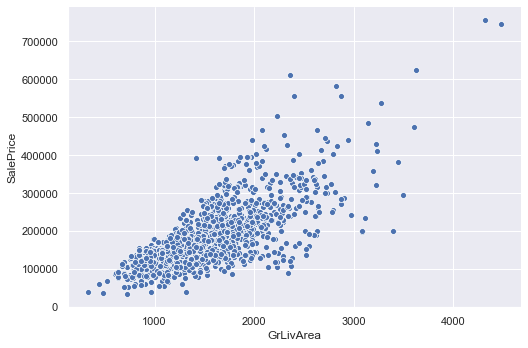

In [23]:
print("GrLivArea - SalePrice - discarded")
display(sns.relplot(x='GrLivArea', y='SalePrice', aspect=1.5, data=train_data))

In this case, the points at the right-bottom with large GrLivArea have much lower costs(Maybe rural areas).

They are obviously not common instances, we discard them.

TotalBsmtSF - SalePrice


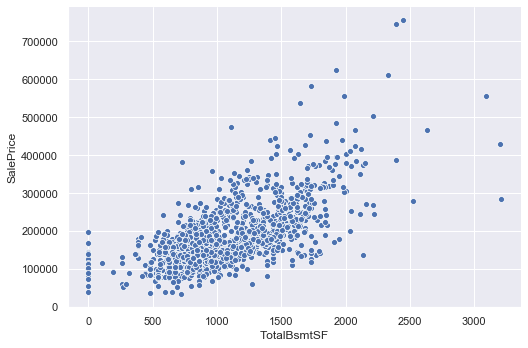

In [24]:
print("TotalBsmtSF - SalePrice")
display(sns.relplot(x='TotalBsmtSF', y='SalePrice', aspect=1.5, data=train_data))

In [25]:
train_data = train_data.drop(train_data.loc[train_data['TotalBsmtSF']>4000].loc[train_data['SalePrice']<200000].index)

TotalBsmtSF - SalePrice - discarded


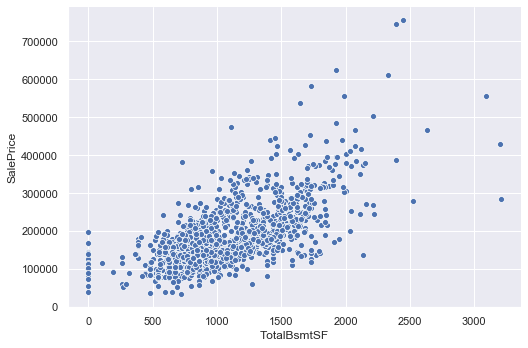

In [26]:
print("TotalBsmtSF - SalePrice - discarded")
display(sns.relplot(x='TotalBsmtSF', y='SalePrice', aspect=1.5, data=train_data))

In this case, that abnormal point at right-bottom is also discarded.

---

# Part 2 Reasoning from Data

## 1 The HousePrice

As mentioned above, we're now going to use our processed data, to find out what the HousePrice indeed is. 

### Normality

This part had been mentioned early above, SalePrice obeys an skewed normal distribution and we use box-cox transformation to fix it.

**SalePrice**

Origin


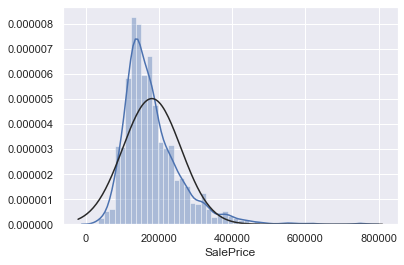

In [27]:
from scipy.stats import norm
sns.set()
print("Origin")
sns.distplot(train_data['SalePrice'], fit=norm)

Box-Coxed
0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1457, dtype: float64


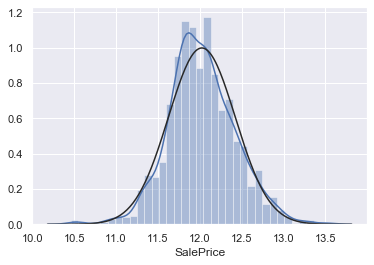

In [28]:
print("Box-Coxed")
train_data['SalePrice'] = np.log(1 + train_data['SalePrice'])
print(train_data['SalePrice'])
sns.distplot(train_data['SalePrice'], fit=norm)

**GrLivArea**

Origin


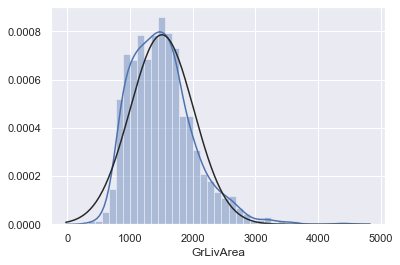

In [29]:
sns.set()
print("Origin")
sns.distplot(train_data['GrLivArea'], fit=norm)

Box-Coxed


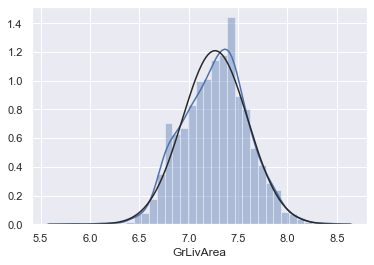

In [30]:
print("Box-Coxed")
train_data['GrLivArea'] = np.log(1+train_data['GrLivArea'])
sns.distplot(train_data['GrLivArea'], fit=norm)

**TotalBsmtSF**

In this case, many houses don't have basement, and a 0-value does not support box-cox transformation.

In order to solve it, we construct an additional feature 'HasBsmt'.

In [31]:
train_data['TotalBsmtSF'] = np.log(1+train_data['TotalBsmtSF'])

Box-Coxed


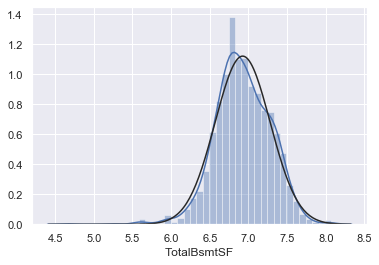

In [32]:
sns.set()
print("Box-Coxed")
sns.distplot(train_data.loc[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)

### Homoscedasticity

We will measure homoscedasticity by graphing and plotting the features.

**SalePrice - GrLivArea**

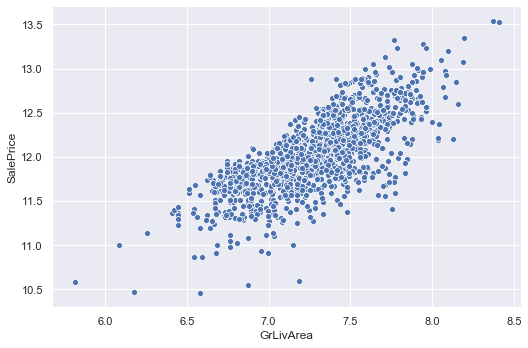

In [33]:
sns.relplot(x='GrLivArea', y='SalePrice', aspect=1.5, data=train_data)

**SalePrice - TotalBsmtSF**

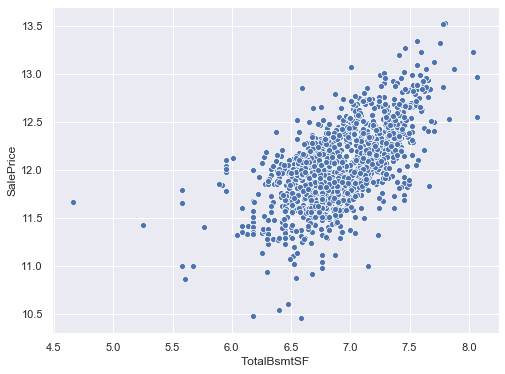

In [34]:
plt.subplots(figsize=(8,6))
sns.scatterplot(x=train_data.loc[train_data['TotalBsmtSF']>0]['TotalBsmtSF'], y=train_data.loc[train_data['TotalBsmtSF']>0]['SalePrice'], )

Do the same transformation on test_data:

In [35]:
test_data['GrLivArea'] = np.log(1+test_data['GrLivArea'])
test_data['TotalBsmtSF'] = np.log(1+test_data['TotalBsmtSF'])

In [36]:
display(train_data)
display(test_data)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,12.072547
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,12.254868
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,12.493133
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,11.864469


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


## 2 Categorical Data

We often use get_dummies() to change categorical data into one-hot form, this case is no exception.

In [37]:
X_train = pd.get_dummies(train_data).drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

X_test = pd.get_dummies(test_data)

In [38]:
display(X_train)
display(X_test)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,546.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,1894,4,5,1970,1970,252.0,0.0,294.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,20000,5,7,1960,1996,1224.0,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,10441,5,5,1992,1992,337.0,0.0,575.0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
for i in X_train:
    if i not in X_test:
        X_test[i] = 0

---

# Part 3 Training the Model

In [40]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import joblib

pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False))], 'verbose': False, 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True), 'randomforestregressor': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
           

In [41]:
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1],
                  'randomforestregressor__max_leaf_nodes': [None, 2, 5, 7]}

clf = GridSearchCV(pipeline, hyperparameters, cv=10)
 
# Fit and tune model
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(bootstrap=True,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split

In [42]:
print(clf.best_params_)
print(clf.refit)

{'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_leaf_nodes': None}
True


In [43]:
prediction = clf.predict(X_train)

print(r2_score(y_train, prediction))
print(mean_squared_error(y_train, prediction))

0.9839648982234233
0.002561933489449528


In [44]:
missing_sum = X_test.isnull().sum().sort_values(ascending=False)
missing_rate = (missing_sum/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_sum, missing_rate], axis=1, keys=['Total','Missing Rate'], sort=False)
display(missing_data.head(20))

,Total,Missing Rate
BsmtFullBath,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFinSF1,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
TotalBsmtSF,1,0.000685
BsmtUnfSF,1,0.000685
BsmtFinSF2,1,0.000685
Neighborhood_SWISU,0,0.000000
Neighborhood_NPkVill,0,0.000000


In [45]:
X_test.fillna(0, inplace=True)

In [46]:
missing_sum = X_test.isnull().sum().sort_values(ascending=False)
missing_rate = (missing_sum/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_sum, missing_rate], axis=1, keys=['Total','Missing Rate'], sort=False)
display(missing_data.head(20))

,Total,Missing Rate
Electrical_Mix,0,0.0
Neighborhood_MeadowV,0,0.0
Neighborhood_Somerst,0,0.0
Neighborhood_SawyerW,0,0.0
Neighborhood_Sawyer,0,0.0
Neighborhood_SWISU,0,0.0
Neighborhood_OldTown,0,0.0
Neighborhood_NridgHt,0,0.0
Neighborhood_NoRidge,0,0.0
Neighborhood_NWAmes,0,0.0


In [51]:
prediction = clf.predict(X_test)
prediction = np.exp(prediction) - 1
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': prediction})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


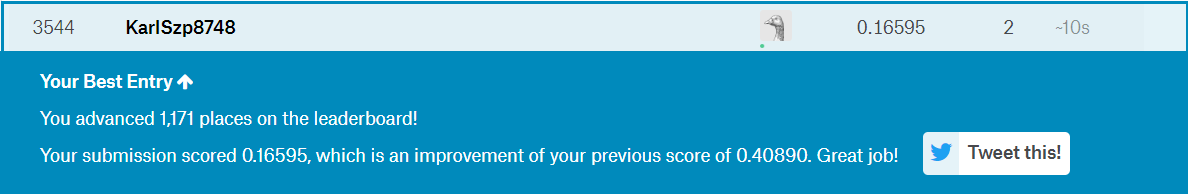